In [1]:
# Analysis of Electricity usage in a Residential Complex 
# NUMPY-Random data Generation, Arrays 
# Pandas Grouping, Filtering, aggregation 
# Visualization: Line and bar charts for timeseries and category analysis
# Anomalies, reporting trends 

In [1]:
import numpy as np

In [7]:
import pandas as pd

In [86]:
np.random.seed(42)

In [66]:
apartments = [f"Apt_({i})"for i in range(1,21)]

In [67]:
dates = pd.date_range(start = "2025-07-01", periods = 30, freq = "D")

In [68]:
dates

DatetimeIndex(['2025-07-01', '2025-07-02', '2025-07-03', '2025-07-04',
               '2025-07-05', '2025-07-06', '2025-07-07', '2025-07-08',
               '2025-07-09', '2025-07-10', '2025-07-11', '2025-07-12',
               '2025-07-13', '2025-07-14', '2025-07-15', '2025-07-16',
               '2025-07-17', '2025-07-18', '2025-07-19', '2025-07-20',
               '2025-07-21', '2025-07-22', '2025-07-23', '2025-07-24',
               '2025-07-25', '2025-07-26', '2025-07-27', '2025-07-28',
               '2025-07-29', '2025-07-30'],
              dtype='datetime64[ns]', freq='D')

In [69]:
data = {
    "Date" : np.tile(dates,len(apartments)),
    "Apartment": np.repeat(apartments,len(dates)),
    "Electricity Usage":np.random.normal(loc = 20,scale = 5, size = len(dates)*len(apartments))
}

In [70]:
df = pd.DataFrame(data)

In [71]:
df

,Date,Apartment,Electricity Usage
0,2025-07-01,Apt_(1),15.880323
1,2025-07-02,Apt_(1),16.404453
2,2025-07-03,Apt_(1),30.249060
3,2025-07-04,Apt_(1),20.003414
4,2025-07-05,Apt_(1),23.910650
...,...,...,...
595,2025-07-26,Apt_(20),17.520609
596,2025-07-27,Apt_(20),25.486501
597,2025-07-28,Apt_(20),12.171760
598,2025-07-29,Apt_(20),4.961838


In [72]:
df["Electricity Usage"] = df["Electricity Usage"].round(2)

In [73]:
print(df.isnull().sum())

Date                 0
Apartment            0
Electricity Usage    0
dtype: int64


In [74]:
print(df.describe())

                      Date  Electricity Usage
count                  600         600.000000
mean   2025-07-15 12:00:00          19.712933
min    2025-07-01 00:00:00           4.960000
25%    2025-07-08 00:00:00          16.437500
50%    2025-07-15 12:00:00          19.700000
75%    2025-07-23 00:00:00          22.842500
max    2025-07-30 00:00:00          36.220000
std                    NaN           4.929930


In [75]:
print(df.dtypes)

Date                 datetime64[ns]
Apartment                    object
Electricity Usage           float64
dtype: object


In [79]:
usage_per_apartment = df.groupby("Apartment")["Electricity Usage"].sum().sort_values(ascending = False)
print(usage_per_apartment)

Apartment
Apt_(13)    643.80
Apt_(4)     642.10
Apt_(3)     635.95
Apt_(17)    621.48
Apt_(12)    619.19
Apt_(18)    611.39
Apt_(2)     600.48
Apt_(11)    598.84
Apt_(15)    595.99
Apt_(9)     591.11
Apt_(19)    589.84
Apt_(1)     586.97
Apt_(16)    579.16
Apt_(10)    575.26
Apt_(6)     568.67
Apt_(8)     564.31
Apt_(20)    560.19
Apt_(7)     555.79
Apt_(5)     554.27
Apt_(14)    532.97
Name: Electricity Usage, dtype: float64


In [81]:
daily_avg = df.groupby("Date")["Electricity Usage"].mean()
print(daily_avg.head())

Date
2025-07-01    19.2975
2025-07-02    20.4775
2025-07-03    20.8440
2025-07-04    18.5445
2025-07-05    20.1430
Name: Electricity Usage, dtype: float64


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns


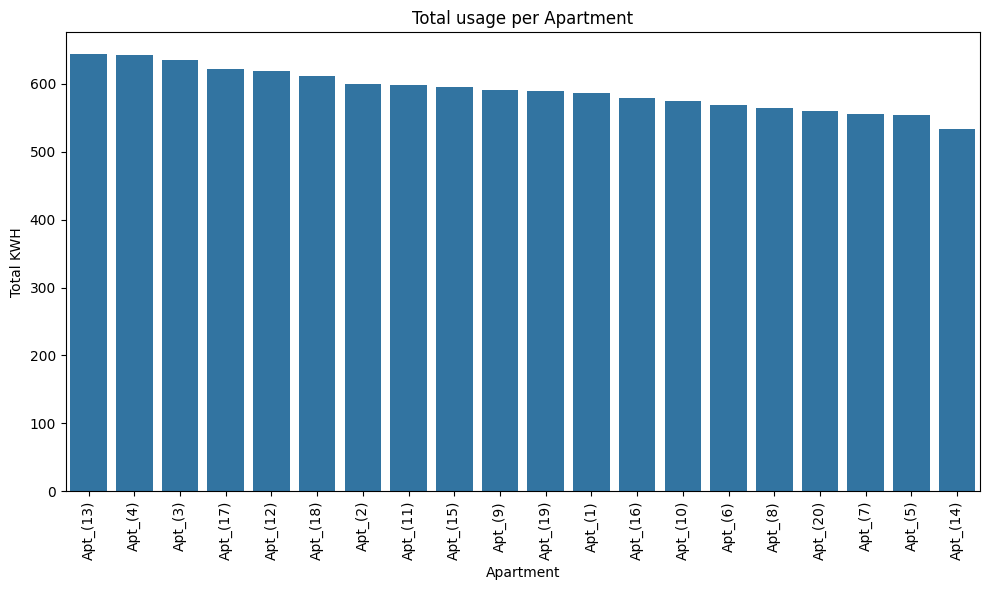

In [84]:
plt.figure(figsize = (10,6))
sns.barplot(x=usage_per_apartment.index, y = usage_per_apartment.values)
plt.xticks(rotation = 90)
plt.title("Total usage per Apartment")
plt.xlabel("Apartment")
plt.ylabel("Total KWH")
plt.tight_layout()
plt.show()

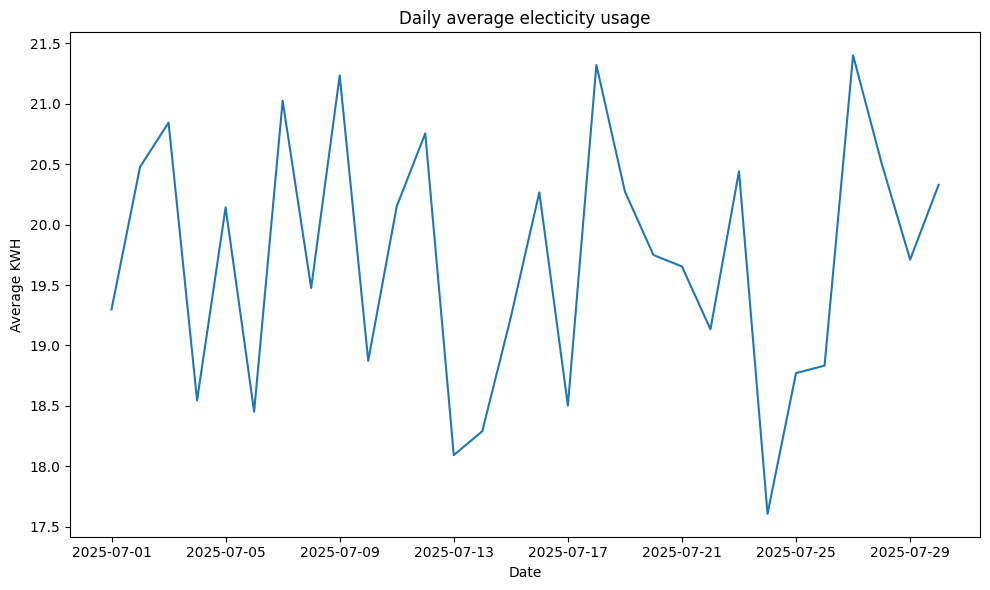

In [85]:
plt.figure(figsize = (10,6))
sns.lineplot(x=daily_avg.index, y = daily_avg.values)
plt.title("Daily average electicity usage")
plt.xlabel("Date")
plt.ylabel("Average KWH")
plt.tight_layout()
plt.show()